In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from os import listdir
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPool2D, Conv2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
mfcc_files = ['../data/mfcc/' + f for f in listdir('../data/mfcc/') if '_mfcc.pkl' in f]
target_files = ['../data/target/' + f for f in listdir('../data/target/') if '_target.pkl' in f]

mfcc_files.sort()
target_files.sort()

In [28]:
def reload(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

In [29]:
mfcc_reloaded = [reload(f) for f in mfcc_files]
target_reloaded = [reload(f) for f in target_files]

In [30]:
X = np.concatenate(mfcc_reloaded)

In [31]:
y = np.concatenate(target_reloaded)

In [34]:
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

In [36]:
y = np.where(y == 'en', 0, 1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
model = Sequential()
model.add(BatchNormalization())
model.add(Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (20, 157, 1)))
model.add(Conv2D(filters = 10, kernel_size = 10, activation = 'relu', input_shape = (20, 157, 1)))
model.add(Flatten())
model.add(Dropout(.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [41]:
earlystop = EarlyStopping(patience=5)

In [43]:
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    callbacks=[earlystop],
    epochs=25
)

Epoch 1/25
223/223 [==============================] - 31s 134ms/step - loss: 0.5509 - acc: 0.7087 - val_loss: 0.3467 - val_acc: 0.8511
Epoch 2/25
223/223 [==============================] - 30s 133ms/step - loss: 0.3411 - acc: 0.8637 - val_loss: 0.2747 - val_acc: 0.8944
Epoch 3/25
223/223 [==============================] - 30s 132ms/step - loss: 0.2280 - acc: 0.9184 - val_loss: 0.2012 - val_acc: 0.9163
Epoch 4/25
223/223 [==============================] - 29s 131ms/step - loss: 0.1530 - acc: 0.9412 - val_loss: 0.2021 - val_acc: 0.9197
Epoch 5/25
223/223 [==============================] - 30s 133ms/step - loss: 0.1203 - acc: 0.9569 - val_loss: 0.1893 - val_acc: 0.9260
Epoch 6/25
223/223 [==============================] - 34s 151ms/step - loss: 0.0920 - acc: 0.9645 - val_loss: 0.1929 - val_acc: 0.9298
Epoch 7/25
223/223 [==============================] - 32s 142ms/step - loss: 0.0643 - acc: 0.9770 - val_loss: 0.2768 - val_acc: 0.9117
Epoch 8/25
223/223 [==============================] - 3

Text(0.5, 1.0, 'Results')

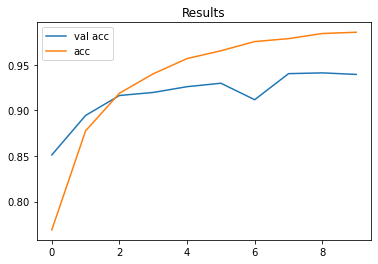

In [44]:
# plot
plt.plot(history.history['val_acc'], label = 'val acc')
plt.plot(history.history['acc'], label = 'acc')
plt.legend()
plt.title('Results')